Jittering data (a way to reduce overlapping between data points with scatter plot) can be done by using Seaborn through `sns.stripplot()` (for categorical plotting) and `sns.swarmplot()` (jittering along the x-axis). However, I would like to try manual jittering with just `matplotlib`.

The trick, taken from [this thread on StackOverflow](https://stackoverflow.com/questions/53093560/python-scatter-plot-overlapping-data), is quite clever I must say.

I have also looked at these threads on StackOverflow: [Matplotlib: avoiding overlapping datapoints in a “scatter/dot/beeswarm” plot](https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot), which has two additional methods that I tried but did not quite work, particularly the one using the kernel density estimate (KDE). It looks cool tho.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
dataset = {
    "Subject": ["M", "N", "O", "P", "Q", "R", "S", "T"],
    "Protein": ["A", "A", "A", "A", "B", "B", "B", "B"],
    "Levels": [12.1, 12.2, 12, 12, 12, 12.1, 12.1, 11.9]
}

df = pd.DataFrame(dataset)

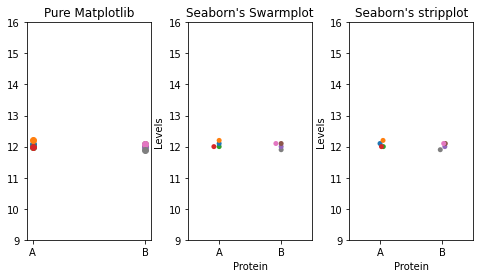

In [3]:
fig, ax = plt.subplots(figsize=(8, 4), ncols=3)
fig.subplots_adjust(wspace=0.3)
for name, group in df.groupby("Subject"):
    ax[0].plot(group["Protein"], group["Levels"], marker="o", linestyle="")
    ax[0].set_title("Pure Matplotlib")
    
sns.swarmplot(data=df, x="Protein", y="Levels", hue="Subject", ax=ax[1])
ax[1].get_legend().remove()
ax[1].set_title("Seaborn's Swarmplot")

sns.stripplot(data=df, x="Protein", y="Levels", hue="Subject", ax=ax[2])
ax[2].get_legend().remove()
ax[2].set_title("Seaborn's stripplot")

for i in [0, 1, 2]:
    ax[i].set_ylim(9, 16)

As you can see above, `sns.swarmplot()` jitters data only by the x-axis while `sns.stripplot()` jitters data by both x-axis and y-axis.

With Matplotlib, it is quite challenging to jitter along the x-axis, unless we change it from categorical (with string, like "A" and "B" here) with integer or float. We can do so using the `df.replace()` function.

In [4]:
df["Protein"] = df["Protein"].replace(to_replace={"A": 1, "B": 3})

Function to jitter an array of data, get the value for the `array` parameter from a `pd.Series` with `df["Column"].to_numpy()`.

The parameter `f1` and `f2` are arbitrary parameters that influence the jittering.

In [5]:
def jitter(array, f1=0.1, f2=0.05):
    return array + f1 * np.random.rand(len(array)) - f2

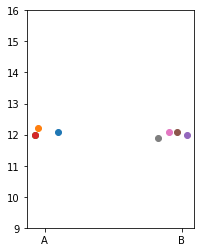

In [6]:
# Set up the drawing canvas
fig, ax = plt.subplots(figsize=(3, 4))

# Perform jittering, store as new column: "Protein_jittered"
df["Protein_jittered"] = jitter(df["Protein"].to_numpy(), f1=0.75, f2=0.5)

# Start drawing
for name, group in df.groupby("Subject"):
    ax.plot(group["Protein_jittered"], group["Levels"], marker="o", linestyle="")

# Customization to re-do the axis labeling
ax.set_ylim(9, 16)
ax.set_xticks([1, 3])
ax.set_xticklabels(["A", "B"])

# Show plot
plt.show()